In [26]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
#loading the dataset
df = pd.read_csv('Sleep_health_and_lifestyle_dataset.csv')
df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [30]:
#checking for missing values
df.isnull().sum()

Person ID                    0
Gender                       0
Age                          0
Occupation                   0
Sleep Duration               0
Quality of Sleep             0
Physical Activity Level      0
Stress Level                 0
BMI Category                 0
Blood Pressure               0
Heart Rate                   0
Daily Steps                  0
Sleep Disorder             219
dtype: int64

In [ ]:
#replacing the null values with 'None' in the column 'Sleep Disorder'
df['Sleep Disorder'].fillna('None', inplace=True)

In [ ]:
#drop column Person ID
df.drop('Person ID', axis=1, inplace=True)

In [116]:
# print the number of unique values for each column to get a quick sense of data variety
print("Unique values in each column:")
for col in df.columns:
    unique_count = df[col].nunique()  # count unique entries in the column
    print(f"{col}: {unique_count}")   # show column name and its unique count

Unique values in each column:
Gender: 2
Age: 31
Occupation: 11
Sleep Duration: 27
Quality of Sleep: 6
Physical Activity Level: 16
Stress Level: 6
BMI Category: 4
Heart Rate: 19
Daily Steps: 20
Sleep Disorder: 3
systolic_bp: 18
diastolic_bp: 17


In [126]:
# clean any sneaky spaces in column names
df.columns = df.columns.str.strip()

# split bp if it’s there, else warn me
if 'Blood Pressure' in df.columns:
    df[['systolic_bp', 'diastolic_bp']] = df['Blood Pressure'].str.split('/', expand=True)
    df.drop('Blood Pressure', axis=1, inplace=True)
else:
    print("no 'Blood Pressure' column found")

no 'Blood Pressure' column found


In [114]:
df['BMI Category'] = df['BMI Category'].replace('Normal Weight', 'Normal')

In [110]:
df.head()


,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,27,9,6.1,6,42,6,3,126/83,77,4200,1
1,1,28,1,6.2,6,60,8,0,125/80,75,10000,1
2,1,28,1,6.2,6,60,8,0,125/80,75,10000,1
3,1,28,6,5.9,4,30,8,2,140/90,85,3000,2
4,1,28,6,5.9,4,30,8,2,140/90,85,3000,2


In [46]:
#unique values from categorical columns
print(df.Occupation.unique())
print('\n')
print(df['BMI Category'].unique())
print('\n')
print(df['Sleep Disorder'].unique())

['Software Engineer' 'Doctor' 'Sales Representative' 'Teacher' 'Nurse'
 'Engineer' 'Accountant' 'Scientist' 'Lawyer' 'Salesperson' 'Manager']


['Overweight' 'Normal' 'Obese' 'Normal Weight']


['None' 'Sleep Apnea' 'Insomnia']


<Axes: xlabel='Sleep Disorder', ylabel='count'>

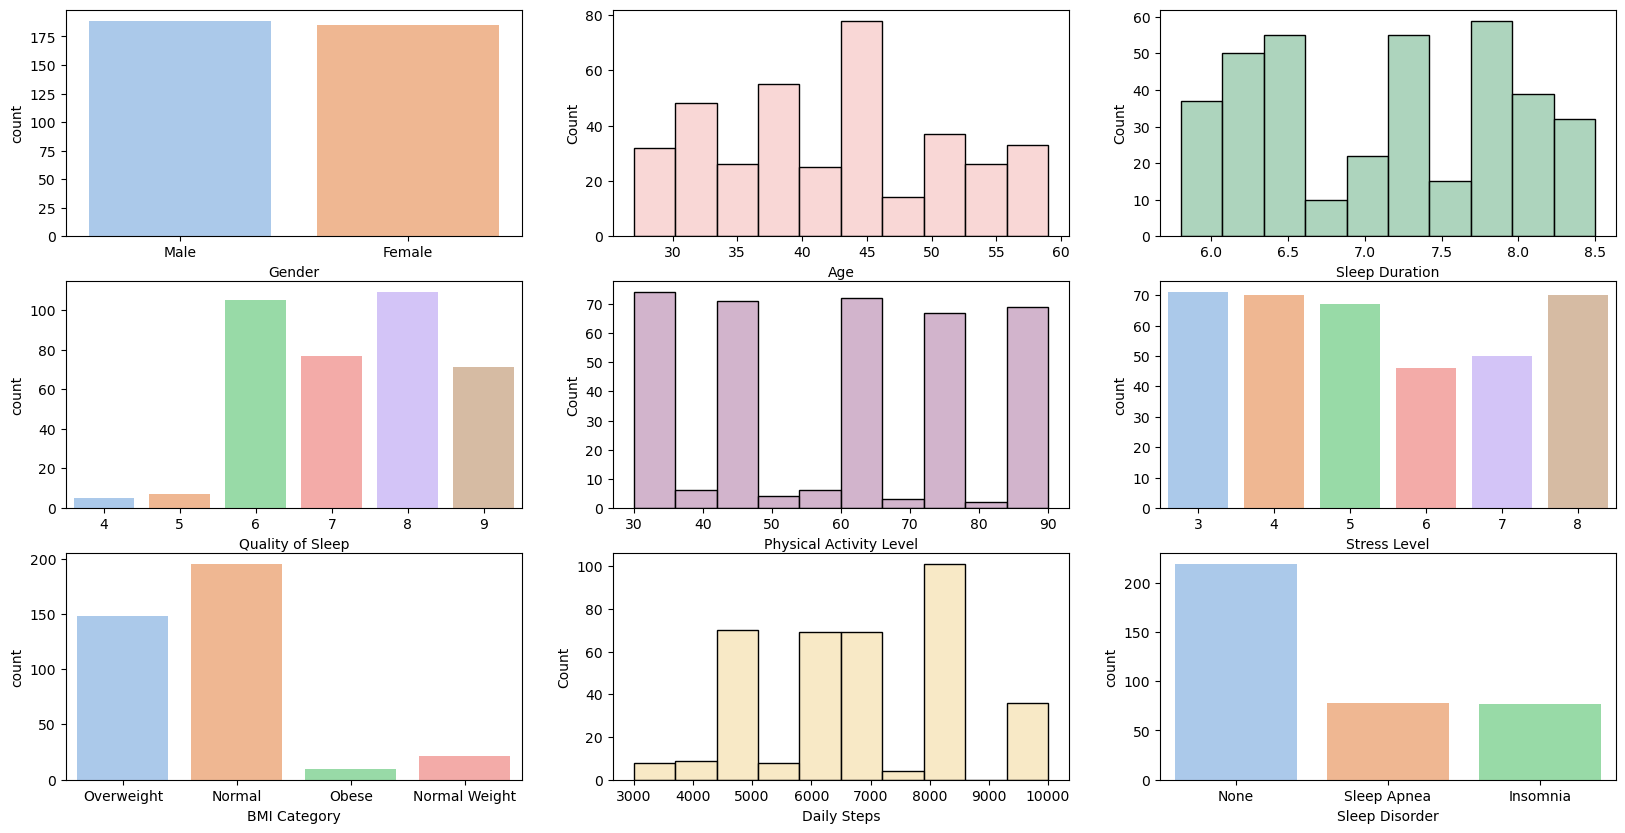

In [66]:
fig, ax = plt.subplots(3,3, figsize=(20,10))

sns.countplot(x='Gender', data=df, ax=ax[0,0], hue='Gender', palette='pastel', legend=False)
sns.histplot(x='Age', data=df, ax=ax[0,1], bins=10, color='#f7cac9')  # soft pink coral-ish
sns.histplot(x='Sleep Duration', data=df, ax=ax[0,2], bins=10, color='#92c6a7')  # soft green

sns.countplot(x='Quality of Sleep', data=df, ax=ax[1,0], hue='Quality of Sleep', palette='pastel', legend=False)
sns.histplot(x='Physical Activity Level', data=df, ax=ax[1,1], bins=10, color='#c49bbb')  # muted orchid-ish
sns.countplot(x='Stress Level', data=df, ax=ax[1,2], hue='Stress Level', palette='pastel', legend=False)

sns.countplot(x='BMI Category', data=df, ax=ax[2,0], hue='BMI Category', palette='pastel', legend=False)
sns.histplot(x='Daily Steps', data=df, ax=ax[2,1], bins=10, color='#f6e2b3')  # light gold
sns.countplot(x='Sleep Disorder', data=df, ax=ax[2,2], hue='Sleep Disorder', palette='pastel', legend=False)


Text(0.5, 1.0, 'Gender and Sleep Disorder')

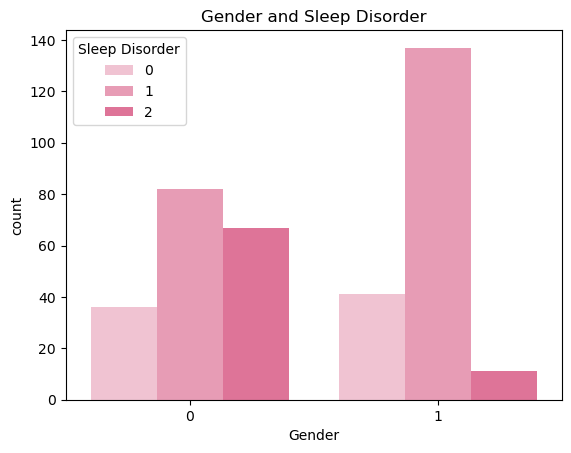

In [106]:
pink_pastel = ['#f8bbd0', '#f48fb1', '#f06292']  # 3 pastel pink shades

sns.countplot(x='Gender', data=df, hue='Sleep Disorder', palette=pink_pastel).set_title('Gender and Sleep Disorder')


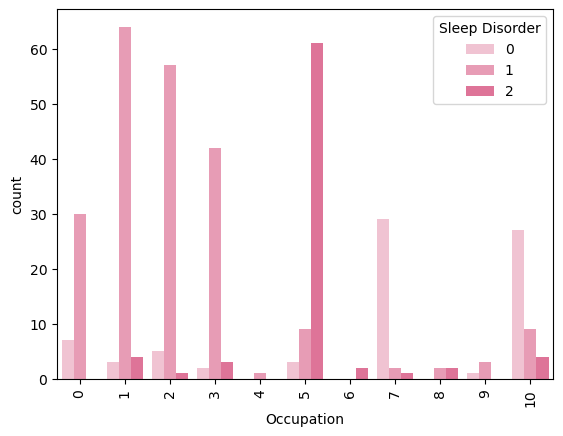

In [104]:
pink_pastel = ['#f8bbd0', '#f48fb1', '#f06292']  # 3 soft pink shades
ax = sns.countplot(x='Occupation', data=df, hue='Sleep Disorder', palette=pink_pastel)
plt.xticks(rotation=90)
plt.legend(title='Sleep Disorder')

Text(0.5, 1.0, 'BMI Category and Sleep Disorder')

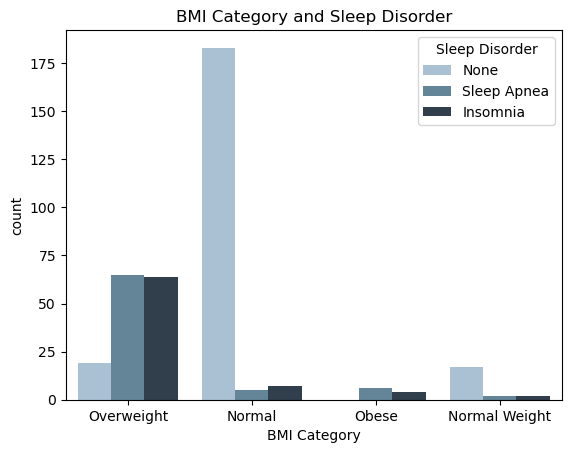

In [82]:
blue_shades = ['#a3c1da', '#5a87a0', '#2c3e50']  # light to dark blue shades

sns.countplot(x='BMI Category', hue='Sleep Disorder', data=df, palette=blue_shades).set_title('BMI Category and Sleep Disorder')

In [86]:
from sklearn.preprocessing import LabelEncoder

vars = ['Gender', 'Occupation', 'BMI Category', 'Sleep Disorder']
for i in vars:
    label_encoder = LabelEncoder()  # make a fresh encoder each loop
    df[i] = label_encoder.fit_transform(df[i])
    print(i, ':', df[i].unique())

Gender : [1 0]
Occupation : [ 9  1  6 10  5  2  0  8  3  7  4]
BMI Category : [3 0 2 1]
Sleep Disorder : [1 2 0]


<Axes: >

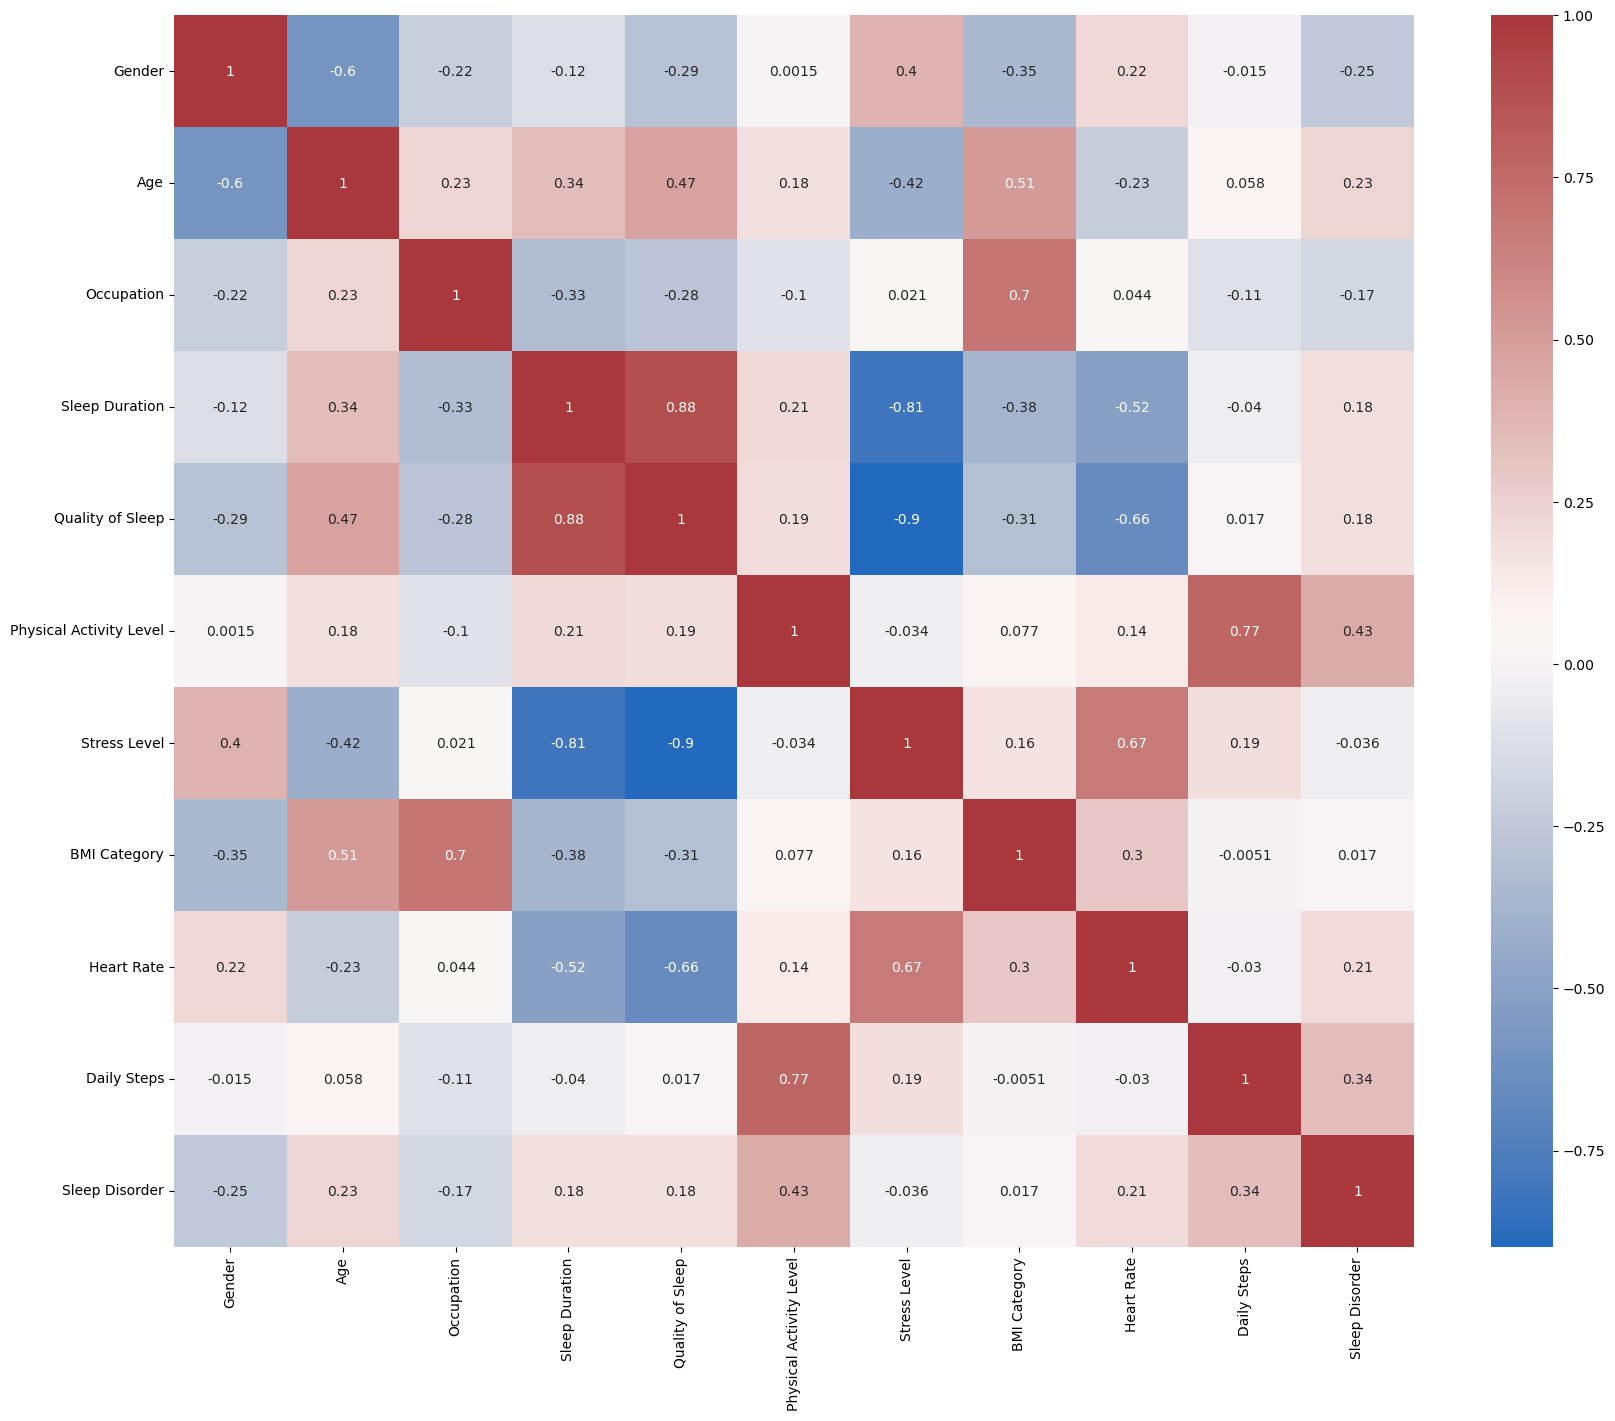

In [128]:
plt.figure(figsize=(20,16))
sns.heatmap(df.select_dtypes(include='number').corr(), annot=True, cmap='vlag')